\newpage

## Question

1) We consider the dataset from the Early Stage of Indians Chronic Kidney Disease (CKD) project for the following analysis. 

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.model_selection import train_test_split

In [38]:
kd = pd.read_csv(r"C:\Users\xuany\OneDrive\Documents\McMaster\23-24\Winter2024\Stats3DA3\Assignment-6-Chronic-Kidney-Disease-Classification-Challenge\kidney_disease.csv")

In [39]:
kd = kd.drop('id', axis = 1)

In [40]:
kd.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [41]:
kd.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [42]:
kd

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


The classification problem here is that we need to predict whether a patient has Chronic Kidney Disease (CKD) based on various medical indicators. According to a literature review by Sanmarchi et al., (2023), CKD is a state of progressive loss of kidney function ultimately resulting in the need for renal replacement therapy. CKD prevalence is growing worldwide, and so it is important to assess how to efficiently diagnose and treat patients with CKD. And so our objective is to use ML to help distinguish between healthy individuals and those with CKD.

2.

In [43]:
float_col = kd.select_dtypes(include = 'float64').columns
object_col = kd.select_dtypes(include = 'object').columns

In [44]:
mappings = {
    'rbc': {'normal': True, 'abnormal': False},
    'pc': {'normal': True, 'abnormal': False},
    'pcc': {'present': True, 'notpresent': False},
    'ba': {'present': True, 'notpresent': False},
    'htn': {'yes': True, 'no': False},
    'dm': {'yes': True, 'no': False},
    'cad': {'yes': True, 'no': False},
    'pe': {'yes': True, 'no': False},
    'ane': {'yes': True, 'no': False},
    'appet': {'good': True, 'poor': False},
}


In [45]:
for column, mapping in mappings.items():
    kd[column] = kd[column].replace(mapping)

In [46]:
kd.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,True,False,False,121.0,...,44,7800,5.2,True,True,False,True,False,False,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,True,False,False,NaN,...,38,6000,NaN,False,False,False,True,False,False,ckd
2,62.0,80.0,1.010,2.0,3.0,True,True,False,False,423.0,...,31,7500,NaN,False,True,False,False,False,True,ckd
3,48.0,70.0,1.005,4.0,0.0,True,False,True,False,117.0,...,32,6700,3.9,True,False,False,False,True,True,ckd
4,51.0,80.0,1.010,2.0,0.0,True,True,False,False,106.0,...,35,7300,4.6,False,False,False,True,False,False,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,False,False,74.0,...,39,7800,4.4,True,True,False,True,True,False,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,True,False,False,100.0,...,36,NaN,NaN,False,False,False,True,False,False,ckd
7,24.0,NaN,1.015,2.0,4.0,True,False,False,False,410.0,...,44,6900,5,False,True,False,True,True,False,ckd
8,52.0,100.0,1.015,3.0,0.0,True,False,True,False,138.0,...,33,9600,4.0,True,True,False,True,False,True,ckd
9,53.0,90.0,1.020,2.0,0.0,False,False,True,False,70.0,...,29,12100,3.7,True,True,False,False,False,True,ckd


In [47]:
scaler = StandardScaler()
kd[float_col] = scaler.fit_transform(kd[float_col])

3.

In [48]:
kd.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,3.560000e+02,3.810000e+02,383.000000,3.130000e+02,3.120000e+02,3.480000e+02
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,-1.796316e-16,-3.729883e-17,0.000000,2.270105e-17,-7.970832e-17,4.083579e-17
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,1.001407e+00,1.001315e+00,1.001308,1.001601e+00,1.001606e+00,1.001440e+00
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,-1.591967e+00,-1.108830e+00,-0.466102,-1.280094e+01,-6.671023e-01,-3.241109e+00
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,-6.193803e-01,-6.032459e-01,-0.378897,-2.433340e-01,-2.594231e-01,-7.655198e-01
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,-3.414983e-01,-3.058433e-01,-0.309133,4.534651e-02,-7.126345e-02,4.248496e-02
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.890038e-01,1.700008e-01,-0.047519,4.302539e-01,8.553625e-02,8.504897e-01
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,4.319341e+00,6.613723e+00,12.719271,2.451017e+00,1.328807e+01,1.813219e+00


The dataset consists of results to various medical tests including blood pressure (bp), hemoglobin, sugar, etc. This is a combination of continuous, discrete, and categorical variables. The initial analysis showed some missing values and possible outliers which were both addressed accordingly.

4.

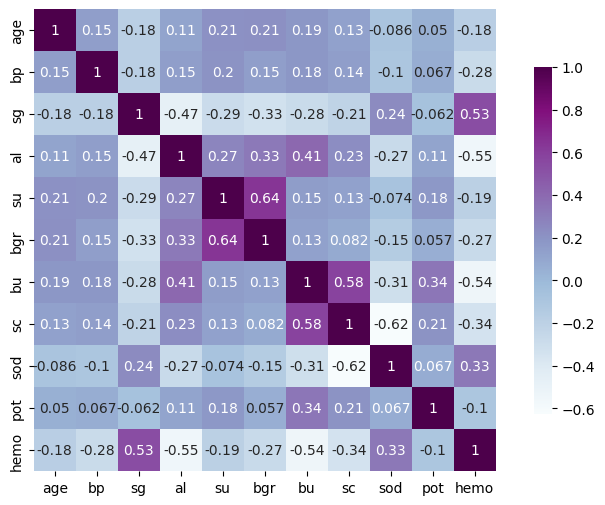

In [49]:
plt.figure(figsize=(10, 6))
df_floats = kd[float_col]
df_floats = df_floats.apply(lambda x: x.fillna(x.mean()), axis=0)
correlation_matrix = df_floats.corr()
sns.heatmap(correlation_matrix, 
    annot=True, 
    cmap='BuPu', 
    cbar=True, 
    square=True, 
    cbar_kws={"shrink": .75})
plt.show()

The correlation matrix and its corresponding heatmap shows us how variables are interrelated. For example, there is a strong positive correlation between the specific gravity of urine (sg) and hemoglobin levels (hemo), a correlation coefficient of 0.53. This means that as the concentration of urine increases (higher specific gravity), hemoglobin levels will increase as well. In addition, there is a strong positive correlation between serum creatinine (sc) and blood urea levels (bu), a correlation coefficient of 0.58. Both of these variables are waste products filtered by the kidneys. So high levels of both of these can correlate to kidney function impairment. In feature selection for CKD prediction, using these two variables may be highly informative as they are highly correlated with eachother. It is useful at this time to consider using Principal Component Analysis to capture information from both variables in a single feature. These findings suggest that some features are closely related to physiological processes affected by CKD and are important for predicting the disease.

5.

In [50]:
missing = kd.isnull().sum()
missing

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [51]:
K_cleaned = kd.dropna()
num = K_cleaned[float_col]

6.

In [52]:
z_scores = np.abs(stats.zscore(num))
outlier = np.where(z_scores > 3)
outlier

(array([ 0,  1,  2,  6, 12, 18, 18, 19, 23, 23, 26, 31, 33, 34, 34, 36, 36,
        38, 38, 39, 40, 40, 40, 41, 41, 42, 42, 42], dtype=int64),
 array([ 8,  8,  5,  4,  7,  4,  9,  6,  6,  7,  8,  7,  7,  4,  7,  4,  5,
         7,  8,  4,  1,  6,  7,  4,  5,  6,  7, 10], dtype=int64))

In [53]:
clean_data = K_cleaned[(z_scores < 3).all(axis = 1)]
clean_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
14,0.963195,0.258373,-1.297699,1.468092,1.412011,True,False,True,True,0.113218,...,16,11000,2.6,True,True,True,False,True,False,ckd
20,0.554978,0.258373,-0.421814,0.727772,-0.410106,False,False,False,False,0.315314,...,24,9200,3.2,True,True,True,False,True,True,ckd
22,-0.203139,0.258373,1.329955,2.208413,-0.410106,True,False,False,False,-0.669904,...,32,6900,3.4,True,False,False,True,False,True,ckd
48,1.254779,-0.473370,-2.173584,-0.752868,-0.410106,True,True,False,False,-0.985679,...,29,18900,3.5,True,True,False,True,True,False,ckd
58,1.254779,0.258373,0.454071,0.727772,-0.410106,False,False,False,False,1.325794,...,33,7200,4.3,True,True,True,True,False,False,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,True,True,False,False,-0.101509,...,47,6700,4.9,False,False,False,True,False,False,notckd
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,True,True,False,False,-0.922524,...,54,7800,6.2,False,False,False,True,False,False,notckd
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,True,True,False,False,-0.606749,...,49,6600,5.4,False,False,False,True,False,False,notckd
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,True,True,False,False,-0.429915,...,51,7200,5.9,False,False,False,True,False,False,notckd


7.

In [54]:
x = K_cleaned.drop('classification', axis = 1)

In [55]:
pca_X = PCA()
pca_loadings = pd.DataFrame(pca_X.fit(x ).components_.T, index =x .columns)
pca_loadings.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age,0.000044,0.020727,0.313500,-0.185826,-0.701004,-0.513627,0.273301,0.140848,-0.036657,0.058009,...,-0.004501,0.005891,0.072952,0.056216,-0.001775,-0.000031,-0.007392,-0.000283,-0.004997,-0.013964
bp,0.000002,0.035400,0.067652,0.046718,0.025120,0.407139,0.825058,-0.102388,-0.318178,-0.095240,...,-0.048738,0.064591,0.027206,-0.064673,0.021877,-0.062808,0.012873,0.044848,-0.002837,-0.028386
sg,-0.000089,-0.069240,-0.349792,0.214633,-0.150371,0.007661,0.210613,-0.233942,0.372096,0.710201,...,-0.094894,-0.018434,0.099751,0.015594,0.013670,0.056837,0.039997,-0.014557,0.020821,0.051542
al,0.000105,0.086506,0.354798,-0.053853,0.245396,0.024628,0.049722,0.366635,-0.004227,0.258650,...,0.186120,-0.034904,0.028970,-0.091987,0.092482,0.028324,-0.031250,0.130183,-0.102601,0.017576
su,0.000048,0.031270,0.400688,0.079648,-0.122333,0.389188,-0.105558,-0.128379,0.213501,0.154699,...,0.028203,0.016616,0.047583,0.293827,0.052177,-0.109216,-0.128249,0.023675,-0.036312,-0.023774
rbc,-0.000011,-0.015295,-0.084867,0.066915,-0.038577,-0.061664,-0.031825,-0.004106,0.030667,0.057753,...,-0.034594,0.343663,-0.012850,-0.696004,0.013198,-0.122331,0.127128,0.128402,0.031432,-0.366889
pc,-0.000021,-0.031640,-0.083082,0.031712,-0.086061,0.050781,0.054878,-0.019013,0.036327,-0.056850,...,0.560321,-0.010241,0.024108,-0.246467,0.362295,0.507457,-0.009504,-0.175262,-0.191054,0.320121
pcc,0.000013,0.016963,0.014968,-0.055576,0.046849,-0.010613,-0.009634,0.006357,-0.105535,0.080766,...,-0.429113,0.342571,-0.105319,-0.006576,0.013106,0.246891,-0.596140,-0.206342,-0.049116,0.263687
ba,0.000014,0.011158,0.054319,-0.037182,0.024958,0.065924,-0.045905,0.035100,-0.091148,-0.050776,...,-0.344878,-0.082938,0.414898,0.058157,0.108969,0.322578,0.465854,-0.488863,0.168440,-0.123985
bgr,0.000056,0.038115,0.443833,-0.095012,-0.201793,0.385907,-0.198867,-0.168903,0.207283,0.043672,...,0.057824,0.143680,0.106218,-0.203356,-0.088188,0.009185,0.109565,0.008531,0.039788,0.040300


In [56]:
x = K_cleaned.drop('classification', axis = 1)

In [57]:
pc_scores = pd.DataFrame(pca_X.fit_transform(x), index = x.index)
pc_scores.head(10)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
3,-1775.937410,12.277046,0.531766,-1.898433,1.606408,-0.467304,-0.989909,1.926934,-1.682763,0.521791,...,0.159883,0.929139,-0.439554,-0.045305,-0.204214,-0.266805,-0.004653,0.155941,0.054602,0.245320
9,3624.062410,9.510131,-0.930548,-0.411131,1.170972,-0.595923,1.413588,0.403137,-0.530532,1.438227,...,-0.542576,-0.020200,-0.525777,0.808045,-0.102422,0.081002,-0.467015,-0.629513,-0.211007,-0.269306
11,-3975.936184,14.552231,1.909266,-1.708721,-0.669518,0.490025,-1.551092,0.242885,-0.408185,0.135829,...,-0.231872,0.827651,0.022348,-0.380794,-0.071166,0.056142,-0.319929,-0.011892,0.060346,0.446355
14,2524.076808,23.743046,-0.438817,-0.121706,-1.087686,0.015895,-0.771560,-0.255492,-0.784187,0.328447,...,-0.847077,0.190483,0.037954,0.040243,0.470340,0.512131,-0.049698,0.274732,0.308311,-0.110322
20,724.069302,17.572271,-0.506429,-0.386704,-0.123167,-0.798790,0.173911,-0.608048,0.306640,-0.143327,...,-0.473666,0.046594,-0.695794,0.467278,0.182941,0.060976,0.762369,0.411019,-0.341455,0.323852
22,-1575.937843,11.966212,-0.400510,-0.263336,1.340764,-1.030050,1.081866,-0.459972,1.065092,1.257075,...,0.318805,-0.237467,-0.187896,-0.065270,-0.003222,-0.677455,0.321314,-0.076714,-0.059160,-0.048937
27,1124.055929,4.360180,3.588732,-0.898130,-0.545584,0.968022,-0.932699,0.135774,0.631844,0.369996,...,-0.423701,-0.233427,-0.366334,0.098219,0.015999,-0.519042,0.040494,0.732504,-0.034374,0.070475
48,10424.058631,2.171564,-0.884234,-0.294943,-0.737895,-1.281444,-0.536519,0.406221,-1.816096,-1.008013,...,-0.104204,-0.535214,-0.367868,-0.566890,0.004325,-0.232705,0.008138,-0.232927,0.019159,0.337082
58,-1275.939058,10.609046,0.967723,-0.311546,-0.860728,-0.473476,0.630491,-0.270219,1.082898,0.155510,...,-0.578772,-0.841221,-0.514679,0.012282,0.150838,-0.004278,0.203406,0.183637,0.134639,0.025553
71,6124.061988,7.658179,-1.018959,-0.083708,-0.027700,-0.583388,-1.440136,-0.829040,-0.022162,-1.067701,...,0.366961,-0.616784,-0.510320,-0.692936,0.320733,-0.160674,-0.143976,-0.458737,-0.114637,-0.105438


In [58]:
pc_scores[0]

3     -1775.937410
9      3624.062410
11    -3975.936184
14     2524.076808
20      724.069302
          ...     
395   -1775.953785
396    -675.961775
397   -1875.955914
398   -1275.958300
399   -1675.960104
Name: 0, Length: 158, dtype: float64

In [59]:
km = KMeans(n_clusters = 2, 
    n_init = 20, 
    random_state = 0)
km.fit(x)
km.labels_

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [60]:
pd.Series(km.labels_).value_counts()

0    143
1     15
Name: count, dtype: int64

In [61]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,True,False,True,False,-0.392022,...,-0.456071,32,6700,3.9,True,False,False,False,True,True
9,0.088445,0.990117,0.454071,0.727772,-0.410106,False,False,True,False,-0.985679,...,-1.040585,29,12100,3.7,True,True,False,False,False,True
11,0.671612,-0.473370,-1.297699,1.468092,-0.410106,False,False,True,False,2.929931,...,-0.593604,32,4500,3.8,True,True,False,False,True,False
14,0.963195,0.258373,-1.297699,1.468092,1.412011,True,False,True,True,0.113218,...,-2.381529,16,11000,2.6,True,True,True,False,True,False
20,0.554978,0.258373,-0.421814,0.727772,-0.410106,False,False,False,False,0.315314,...,-1.659482,24,9200,3.2,True,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.205078,0.258373,0.454071,-0.752868,-0.410106,True,True,False,False,-0.101509,...,1.091172,47,6700,4.9,False,False,False,True,False,False
396,-0.553039,-0.473370,1.329955,-0.752868,-0.410106,True,True,False,False,-0.922524,...,1.366237,54,7800,6.2,False,False,False,True,False,False
397,-2.302541,0.258373,0.454071,-0.752868,-0.410106,True,True,False,False,-0.606749,...,1.125555,49,6600,5.4,False,False,False,True,False,False
398,-2.010957,-1.205114,1.329955,-0.752868,-0.410106,True,True,False,False,-0.429915,...,0.575424,51,7200,5.9,False,False,False,True,False,False


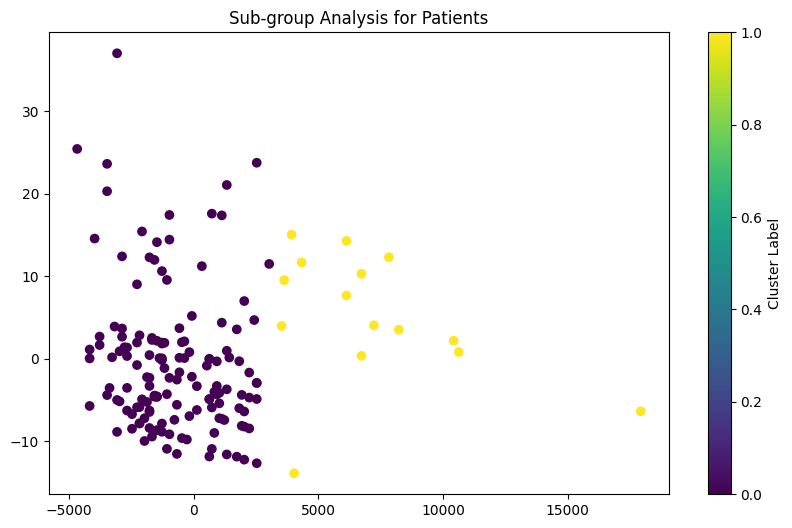

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(pc_scores[0], 
    pc_scores[1], 
    c=km.labels_, 
    cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title('Sub-group Analysis for Patients')
plt.show()

8.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    K_cleaned['classification'],
    test_size = 0.3,
    random_state = 1)

9. The two classifiers we've chosen are logistic regression and decision tree. Logistic regression is an interpretable model that estimates the presence or absence of CKD (binary outcome). The logistic regression coefficients provide insights into the direction and magnitude of the effect of each predictor variable. This is important for understanding the impact of factors like blood pressure, hemoglobin levels, etc. Decision trees are another interpretable model that can handle non-linear relationships between features and the target variable. They clearly illustrate decision-making processes, so it is easy to understand how conclusions are reached.

10. The two metrics selected are AUC-ROC and Sensitivity Analysis. The AUC-ROC (Area Under ROC Curve) assess how well our classifier separates patients with and without CKD at various thresholds. The ROC curve is a plot of the true positive rate against the false positive rate at various thresholds. Because we are working with a medical data within our classification, missing a positive case (failing to identify a patient with CKD) will have grave consequences for the health of the patient. And so, this metric crucial as it measures the proporation of actual positives that are correctly identified by the classifier (true positive rate).

11.

In [28]:
from sklearn.linear_model import LassoCV

In [29]:
X = x
y = K_cleaned['classification'].apply(lambda x: 1 if x == 'ckd' else 0)

cat_features = ['htn', 'dm', 'cad', 'rbc', 'pc']
num_features = ['sg', 'al', 'bgr', 'sod', 'hemo', 'pcv', 'wc', 'rc']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, max_iter=1500)
lasso_cv.fit(X_scaled, y)

sel_features = X.columns[(lasso_cv.coef_ != 0)]
print("Selected features by LassoCV:", sel_features)

print("Optimal alpha chosen by LassoCV:", lasso_cv.alpha_)

Selected features by LassoCV: Index(['sg', 'al', 'rbc', 'pc', 'bgr', 'sod', 'hemo', 'pcv', 'wc', 'rc', 'htn',
       'dm', 'cad'],
      dtype='object')
Optimal alpha chosen by LassoCV: 0.008697490026177835
